# Prerequisites

In [327]:
# Importing required modules

import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# for measuring accuracy, precision, recall, f1 and auc scores
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# for model deployment
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

# Importing Data Set

In [12]:
# creating data file directory
import os
cwd = os.getcwd()
print(cwd)

datadir = os.path.join(cwd, 'Data')
datadirfile = os.path.join(datadir, 'bank-marketing.csv')
print(datadirfile)

C:\Users\nrrvlkp\Documents\M\680\DSC680\DSC680-Projects\Customer Behaviour Prediction
C:\Users\nrrvlkp\Documents\M\680\DSC680\DSC680-Projects\Customer Behaviour Prediction\Data\bank-marketing.csv


In [15]:
# importing data

bankdf = pd.read_csv(datadirfile)
bankdf.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


# Exploratory Data Analysis

In [16]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
V1       45211 non-null int64
V2       45211 non-null object
V3       45211 non-null object
V4       45211 non-null object
V5       45211 non-null object
V6       45211 non-null int64
V7       45211 non-null object
V8       45211 non-null object
V9       45211 non-null object
V10      45211 non-null int64
V11      45211 non-null object
V12      45211 non-null int64
V13      45211 non-null int64
V14      45211 non-null int64
V15      45211 non-null int64
V16      45211 non-null object
Class    45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [22]:
# Renaming columns appropriately
bankdf.columns = ['age',
'job',
'marital_status',
'education',
'default',
'balance',
'housing',
'loan',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'class']


In [49]:
bankdf.head()

,age,job,marital_status,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [27]:
bankdf.shape

(45211, 17)

In [23]:
bankdf.describe()

,age,balance,day,duration,campaign,pdays,previous,class
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,1.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


# Checking for missing values

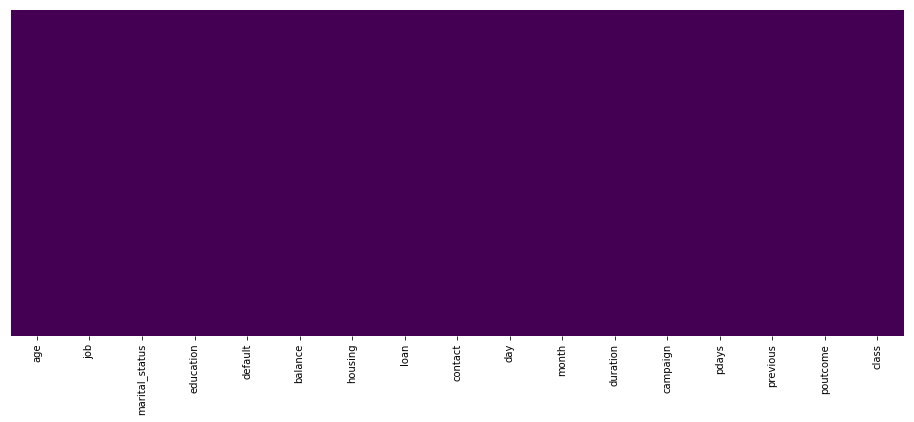

In [25]:
# checking heat map for missing values
plt.figure(figsize=(16, 6))
sns.heatmap(bankdf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [335]:
# Checking for blank values for each column of dataframe
nullcols = bankdf.isnull().sum()
print(nullcols)


age               0
job               0
marital_status    0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
class             0
dtype: int64


All columns are populated in this data set. 

In [28]:
# Getting list of categorical columns
#bankdf.select_dtypes(exclude=['int', 'float']).columns

Index(['age', 'job', 'marital_status', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'class'],
      dtype='object')

# Exploring counts by each category (of categorical variables)

Let us the check the count of customers as per term subscription. Note that this is the actual target variable and expected to be in Boolean type.

Text(0.5, 1.0, 'Count of records by Customer Classification')

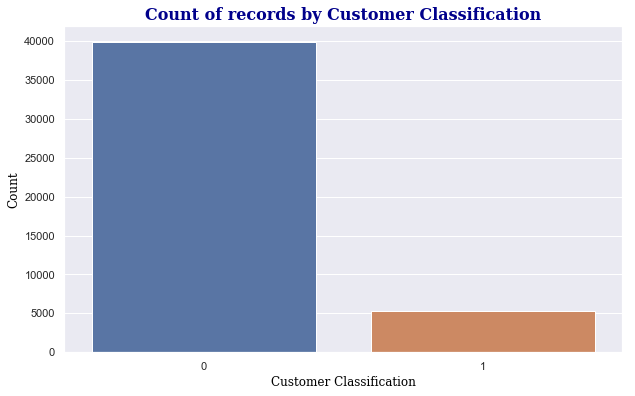

In [334]:
# Draw count plot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="class", data=bankdf)


plt.xlabel("Customer Classification", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.title("Count of records by Customer Classification",fontdict=titlefont)

The class variable is supposed to be binary, instead it is having values - 1 or 2. This need to be tweaked to 0 or 1.

In [187]:
# Changing class variable values to 0 (no) or 1 (yes)

bankdf.loc[bankdf['class'] == 1, 'class'] = 0    # Changing all NO to 0
bankdf.loc[bankdf['class'] == 2, 'class'] = 1    # Changing all YES to 1

In [58]:
titlefont = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 16,
        }

labelfont = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

Text(0.5, 1.0, 'Count of records by Job')

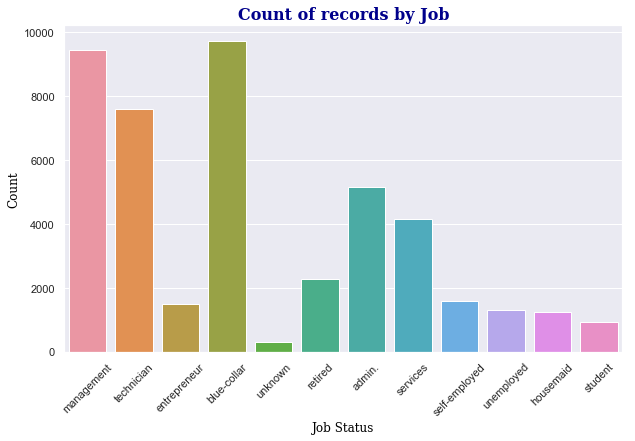

In [67]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="job", data=bankdf)

plt.xlabel("Job Status", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Job", fontdict=titlefont)

In [332]:
bankdf1 = bankdf.groupby(['job', 'class']).size().reset_index().pivot(columns='class', index='job', values=0)
bankdf1

class,0,1
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


Text(0.5, 1.0, 'Count of subscriptions by Job')

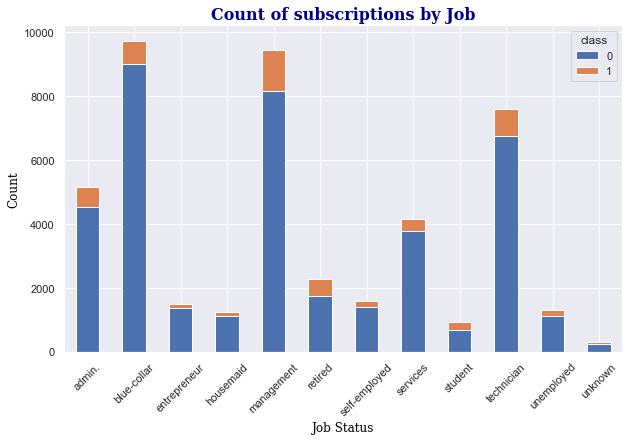

In [333]:
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf1.plot(kind='bar', stacked=True)

plt.xlabel("Job Status", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Job", fontdict=titlefont)


Text(0.5, 1.0, 'Count of records by Marital Status')

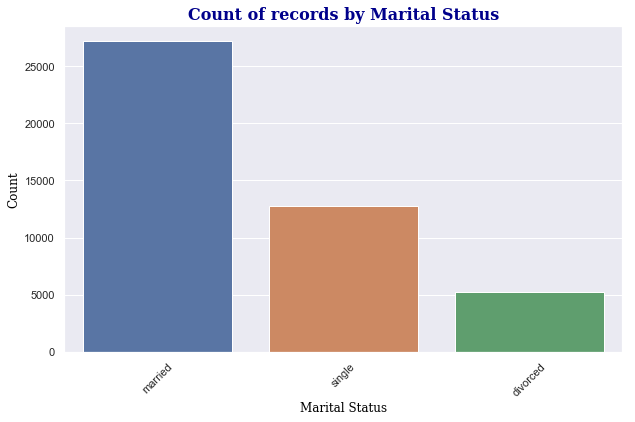

In [68]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="marital_status", data=bankdf)

plt.xlabel("Marital Status", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Count of records by Marital Status", fontdict=titlefont)


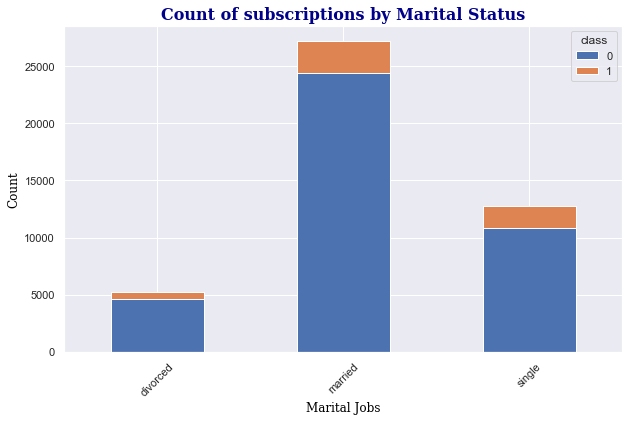

In [246]:
bankdf2 = bankdf.groupby(['marital_status', 'class']).size().reset_index().pivot(columns='class', index='marital_status', values=0)
bankdf2

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf2.plot(kind='bar', stacked=True)

plt.xlabel("Marital Jobs", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Marital Status", fontdict=titlefont)

plt.savefig('Maritalstatus.jpeg',
                    format='jpeg',
                    dpi=90)


Text(0.5, 1.0, 'Count of records by Education')

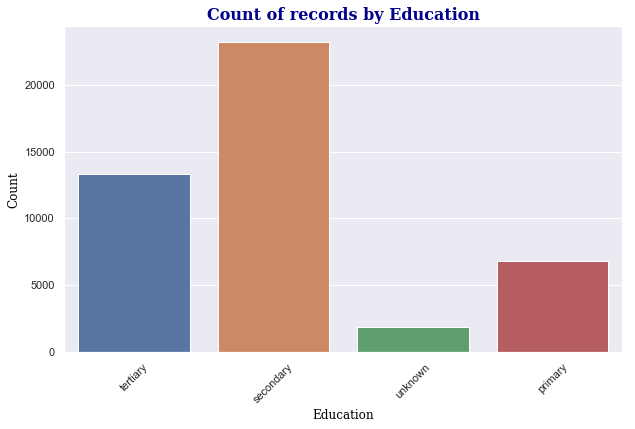

In [69]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="education", data=bankdf)

plt.xlabel("Education", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Count of records by Education", fontdict=titlefont)

Text(0.5, 1.0, 'Count of subscriptions by Education')

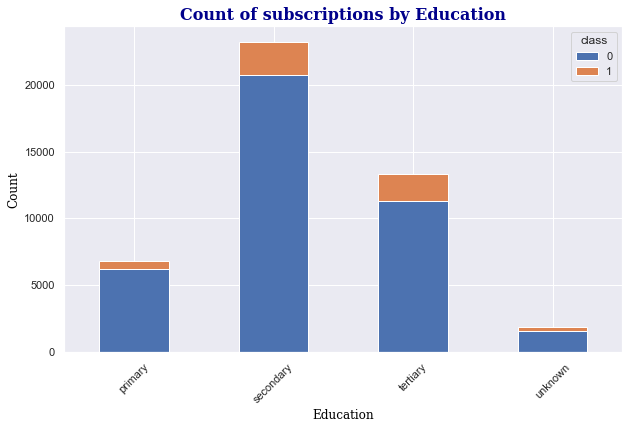

In [248]:
bankdf3 = bankdf.groupby(['education', 'class']).size().reset_index().pivot(columns='class', index='education', values=0)
bankdf3

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf3.plot(kind='bar', stacked=True)

plt.xlabel("Education", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Education", fontdict=titlefont)

Text(0.5, 1.0, 'Count of records by Default Status')

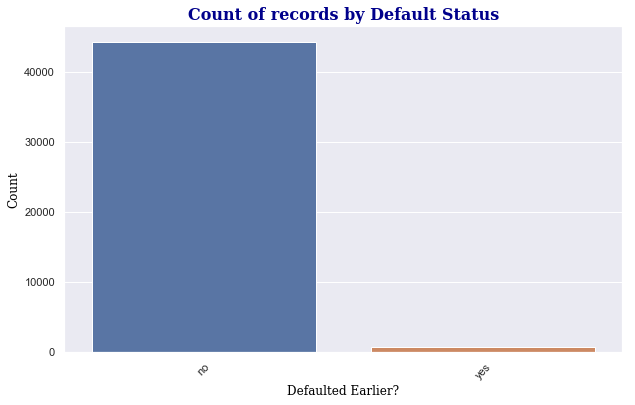

In [71]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="default", data=bankdf)

plt.xlabel("Defaulted Earlier?", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Default Status", fontdict=titlefont)

Text(0.5, 1.0, 'Count of subscriptions by Default status')

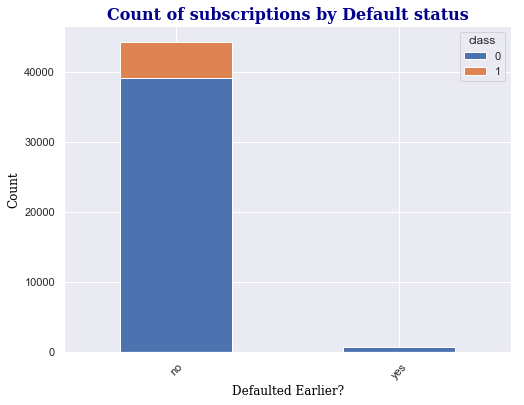

In [250]:
bankdf3 = bankdf.groupby(['default', 'class']).size().reset_index().pivot(columns='class', index='default', values=0)
bankdf3

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [8, 6]
bankdf3.plot(kind='bar', stacked=True)

plt.xlabel("Defaulted Earlier?", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Default status", fontdict=titlefont)

Text(0.5, 1.0, 'Count of records by Housing Loan Status')

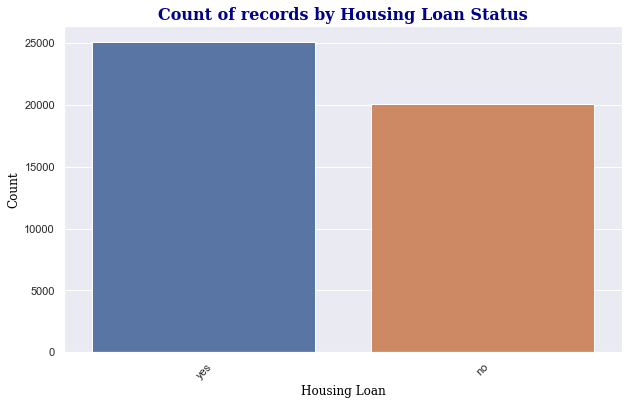

In [72]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="housing", data=bankdf)

plt.xlabel("Housing Loan", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Housing Loan Status",fontdict=titlefont)



Text(0.5, 1.0, 'Count of subscriptions by Housing Loan')

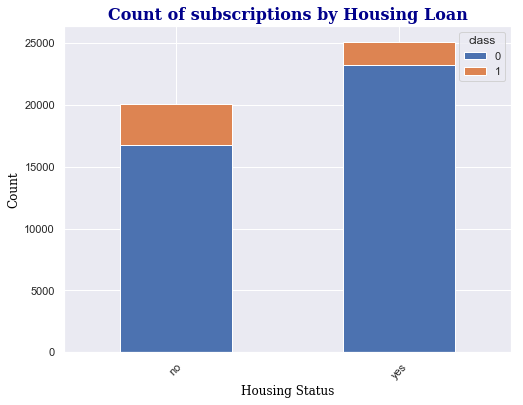

In [251]:
bankdf4 = bankdf.groupby(['housing', 'class']).size().reset_index().pivot(columns='class', index='housing', values=0)
bankdf4

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [8, 6]
bankdf4.plot(kind='bar', stacked=True)

plt.xlabel("Housing Status", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Housing Loan", fontdict=titlefont)

Text(0.5, 1.0, 'Count of records by Personal Loan Status')

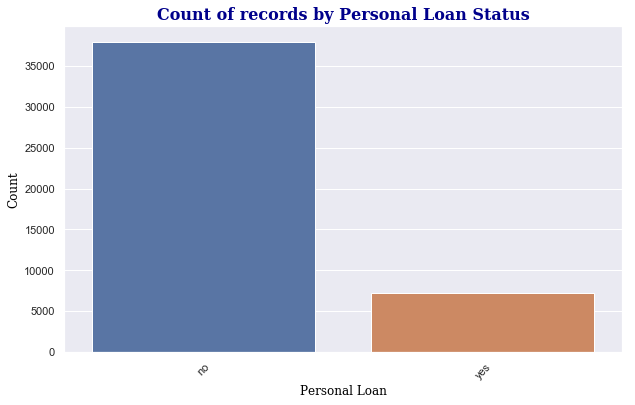

In [73]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="loan", data=bankdf)

plt.xlabel("Personal Loan", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Personal Loan Status",fontdict=titlefont)

Text(0.5, 1.0, 'Count of subscriptions by Personal Loan')

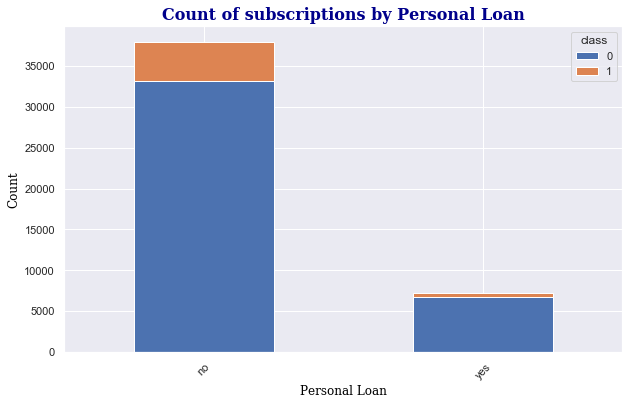

In [252]:
bankdf5 = bankdf.groupby(['loan', 'class']).size().reset_index().pivot(columns='class', index='loan', values=0)
bankdf5

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf5.plot(kind='bar', stacked=True)

plt.xlabel("Personal Loan", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Personal Loan", fontdict=titlefont)

Text(0.5, 1.0, 'Count of records by Contact Method')

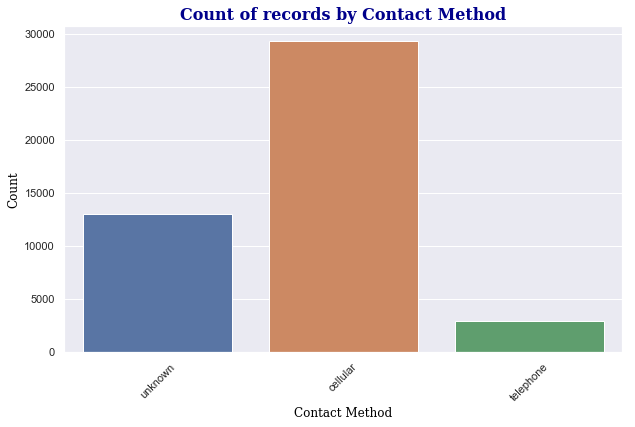

In [240]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="contact", data=bankdf)


plt.xlabel("Contact Method", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Contact Method",fontdict=titlefont)

Text(0.5, 1.0, 'Count of subscriptions by Contact Method')

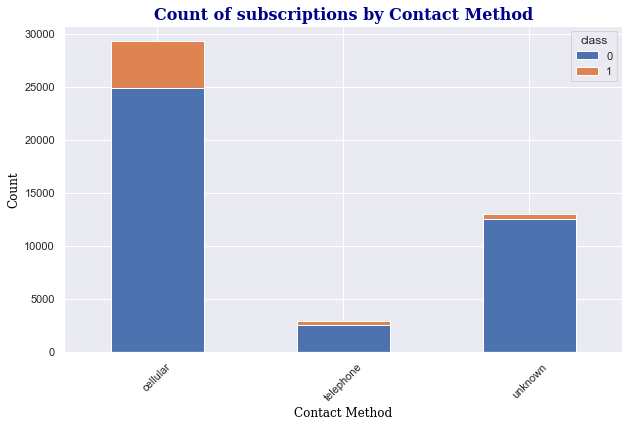

In [253]:
bankdf6 = bankdf.groupby(['contact', 'class']).size().reset_index().pivot(columns='class', index='contact', values=0)
bankdf6

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf6.plot(kind='bar', stacked=True)

plt.xlabel("Contact Method", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Contact Method", fontdict=titlefont)

Text(0.5, 1.0, 'Count of records by Previous Campaign Outcome')

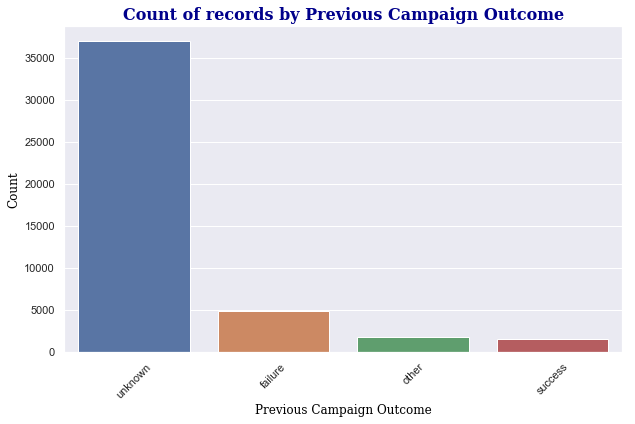

In [75]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="poutcome", data=bankdf)


plt.xlabel("Previous Campaign Outcome", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Previous Campaign Outcome",fontdict=titlefont)

Text(0.5, 1.0, 'Count of subscriptions by Previous Campaign Outcome')

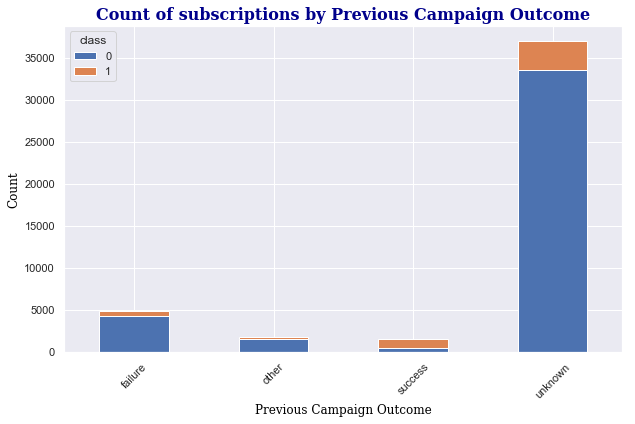

In [254]:
bankdf7 = bankdf.groupby(['poutcome', 'class']).size().reset_index().pivot(columns='class', index='poutcome', values=0)
bankdf7

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf7.plot(kind='bar', stacked=True)

plt.xlabel("Previous Campaign Outcome", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Previous Campaign Outcome", fontdict=titlefont)

Text(0.5, 1.0, 'Count of records by Month')

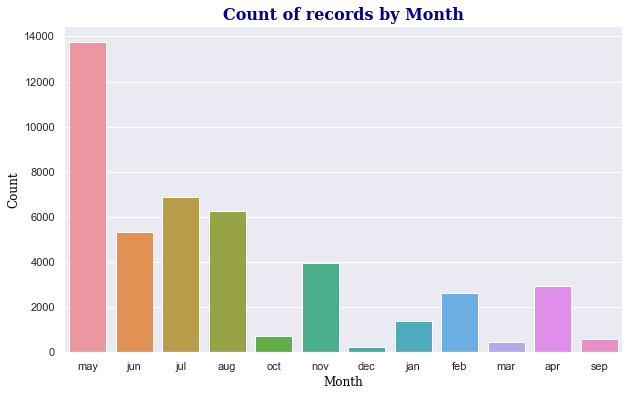

In [89]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="month", data=bankdf)


plt.xlabel("Month", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.title("Count of records by Month",fontdict=titlefont)

Text(0.5, 1.0, 'Count of subscriptions by Month')

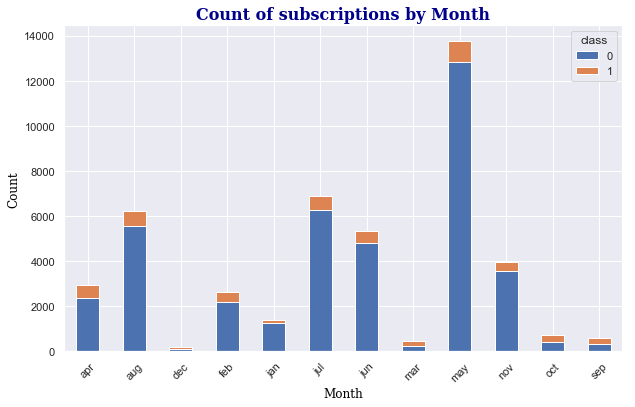

In [255]:
bankdf8 = bankdf.groupby(['month', 'class']).size().reset_index().pivot(columns='class', index='month', values=0)
bankdf8

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf8.plot(kind='bar', stacked=True)

plt.xlabel("Month", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Month", fontdict=titlefont)

The class variable is supposed to be binary, instead it is having values - 1 or 2. This need to be tweaked to 0 or 1. 

Text(0.5, 1.0, 'Balances distribution')

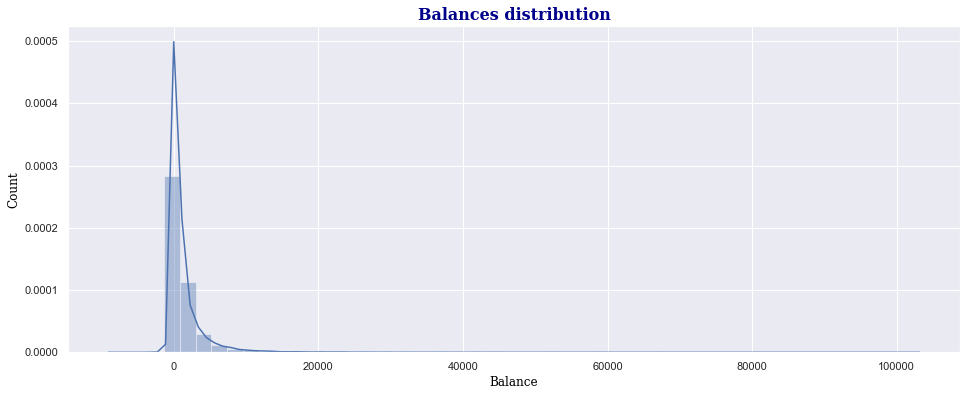

In [263]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
sns.distplot(bankdf.balance, kde=True,color="b")

plt.xlabel("Balance", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.title("Balances distribution", fontdict=titlefont)

Text(0.5, 1.0, 'Balances distribution')

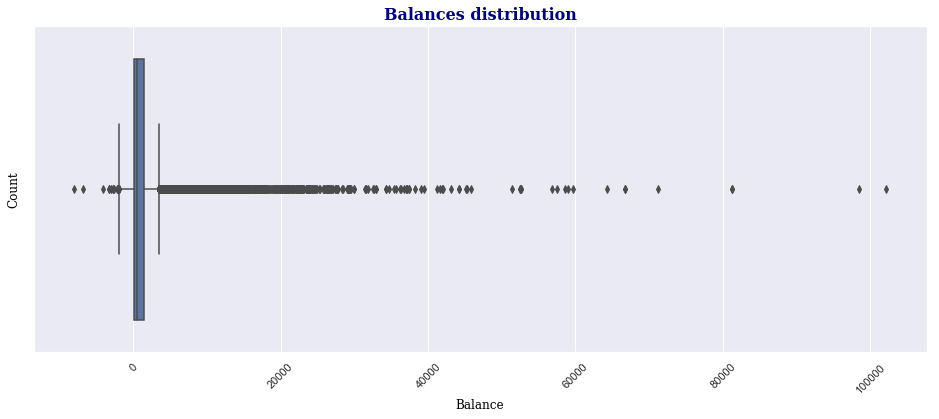

In [82]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="balance", data=bankdf)

plt.xlabel("Balance", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Balances distribution", fontdict=titlefont)


Text(0.5, 1.0, 'Call Duration distribution')

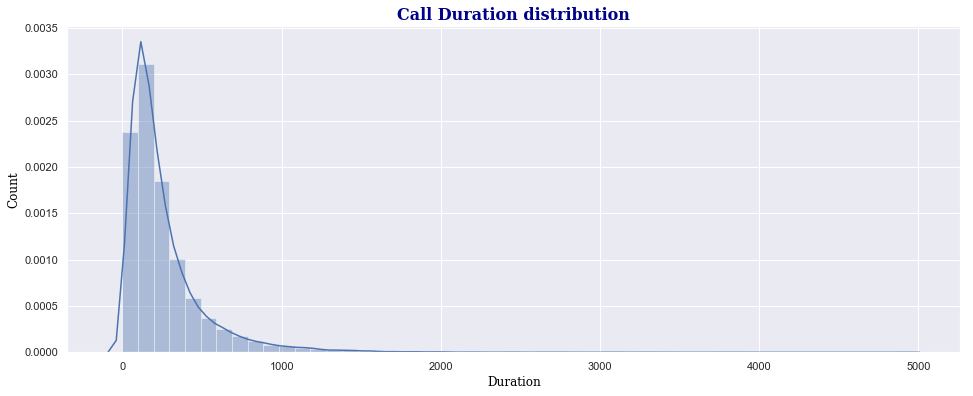

In [262]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
sns.distplot(bankdf.duration, kde=True,color="b")

plt.xlabel("Duration", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.title("Call Duration distribution", fontdict=titlefont)

Text(0.5, 1.0, 'Duration distribution')

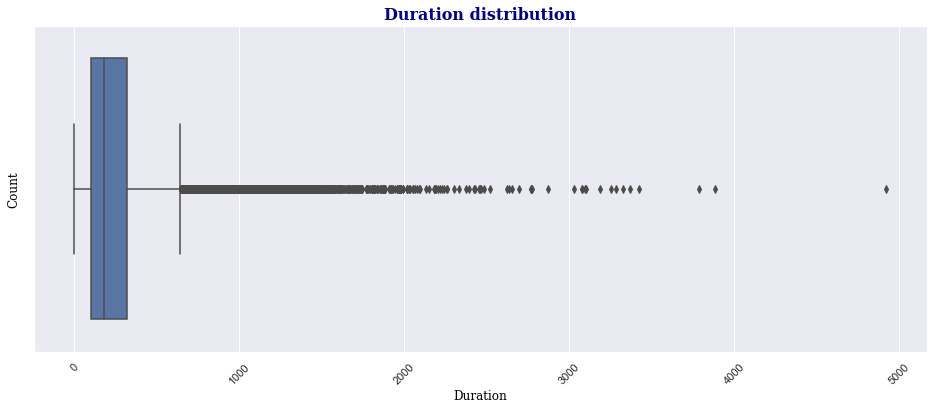

In [83]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="duration", data=bankdf)

plt.xlabel("Duration", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Duration distribution", fontdict=titlefont)


Text(0.5, 1.0, 'Previous contacted date')

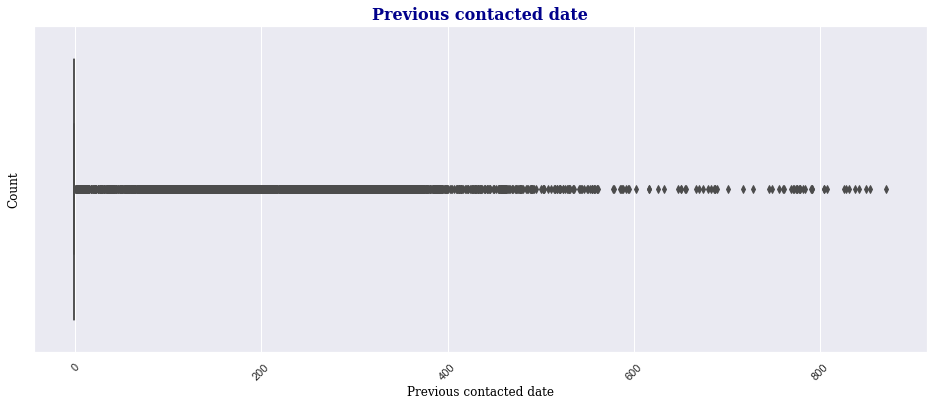

In [84]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="pdays", data=bankdf)

plt.xlabel("Previous contacted date", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Previous contacted date", fontdict=titlefont)


#  Feature Engineering

In [188]:
bankdf_wdummy = pd.get_dummies(bankdf)
bankdf_wdummy.head()

,age,balance,day,duration,campaign,pdays,previous,class,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [189]:
bankdf_wdummy.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'class', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_status_divorced', 'marital_status_married',
       'marital_status_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

To avoid dummy variable trap, one dummy variable for each categorical variable should be removed. Below dummy variable columns are removed

'job_unknown', 'marital_status_divorced','education_unknown','default_no','housing_no', 'loan_no', 
'month_dec','contact_unknown', 'poutcome_unknown'

In [190]:
# Resolving Dummy Variable Trap
bankdf_wdummy_final = bankdf_wdummy[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'class', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_status_married', 'marital_status_single', 
       'education_primary', 'education_secondary',
       'education_tertiary',  'default_yes',
       'housing_yes', 'loan_yes', 'contact_cellular',
       'contact_telephone',  'month_apr', 'month_aug',
       'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       ]]


In [191]:
bankdf_wdummy_final.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'class', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_status_married', 'marital_status_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [192]:
bankdf_wdummy_final.shape

(45211, 43)

# Feature Selection

In [193]:
features = bankdf_wdummy_final.loc[ : , bankdf_wdummy_final.columns != 'class' ]
features.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [194]:
target = bankdf_wdummy_final['class']
target.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [195]:
# feature extraction
fsmodel = ExtraTreesClassifier(n_estimators=10)
fsmodel.fit(features, target)
impfeatures = fsmodel.feature_importances_
print(impfeatures)
print(features.columns)

[0.0892618  0.09003781 0.09059025 0.22836174 0.05846621 0.02929605
 0.02276572 0.01017495 0.00768636 0.00449544 0.00419653 0.01007824
 0.00668078 0.00519648 0.00760489 0.00581605 0.01143321 0.00483891
 0.01228068 0.01112568 0.00790352 0.01399289 0.01133546 0.00279251
 0.01958306 0.01192886 0.01567127 0.00463861 0.0120432  0.00998792
 0.00840817 0.00501125 0.00763345 0.01264853 0.01439031 0.00819758
 0.00678862 0.01256298 0.01052834 0.00937549 0.00721582 0.07697437]
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed',
       'marital_status_married', 'marital_status_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 

In [196]:
indices = np.argsort(impfeatures)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], impfeatures[indices[f]]))

Feature ranking:
1. feature 3 (0.228362)
2. feature 2 (0.090590)
3. feature 1 (0.090038)
4. feature 0 (0.089262)
5. feature 41 (0.076974)
6. feature 4 (0.058466)
7. feature 5 (0.029296)
8. feature 6 (0.022766)
9. feature 24 (0.019583)
10. feature 26 (0.015671)
11. feature 34 (0.014390)
12. feature 21 (0.013993)
13. feature 33 (0.012649)
14. feature 37 (0.012563)
15. feature 18 (0.012281)
16. feature 28 (0.012043)
17. feature 25 (0.011929)
18. feature 16 (0.011433)
19. feature 22 (0.011335)
20. feature 19 (0.011126)
21. feature 38 (0.010528)
22. feature 7 (0.010175)
23. feature 11 (0.010078)
24. feature 29 (0.009988)
25. feature 39 (0.009375)
26. feature 30 (0.008408)
27. feature 35 (0.008198)
28. feature 20 (0.007904)
29. feature 8 (0.007686)
30. feature 32 (0.007633)
31. feature 14 (0.007605)
32. feature 40 (0.007216)
33. feature 36 (0.006789)
34. feature 12 (0.006681)
35. feature 15 (0.005816)
36. feature 13 (0.005196)
37. feature 31 (0.005011)
38. feature 17 (0.004839)
39. feature 2

In [197]:
impfeatdf = pd.DataFrame(features.columns, impfeatures).reset_index()
impfeatdf.rename(columns = {'index':'featureimportance',0: 'featurename'}, inplace = True)
impfeatdf.sort_values('featureimportance',ascending=False)
#impfeatdf.sort_values('impfeatures',ascending=False)

,featureimportance,featurename
3,0.228362,duration
2,0.090590,day
1,0.090038,balance
0,0.089262,age
41,0.076974,poutcome_success
4,0.058466,campaign
5,0.029296,pdays
6,0.022766,previous
24,0.019583,housing_yes
26,0.015671,contact_cellular


# Plotting Cummulative Importance

In [266]:
# Cumulative importances
impfeatdf['cum_imp'] = np.cumsum(impfeatdf.featureimportance)
impfeatdf

,featureimportance,featurename,cum_imp
0,0.089262,age,0.089262
1,0.090038,balance,0.179300
2,0.090590,day,0.269890
3,0.228362,duration,0.498252
4,0.058466,campaign,0.556718
5,0.029296,pdays,0.586014
6,0.022766,previous,0.608780
7,0.010175,job_admin.,0.618955
8,0.007686,job_blue-collar,0.626641
9,0.004495,job_entrepreneur,0.631136


Text(0.5, 1.0, 'Cumulative Importances')

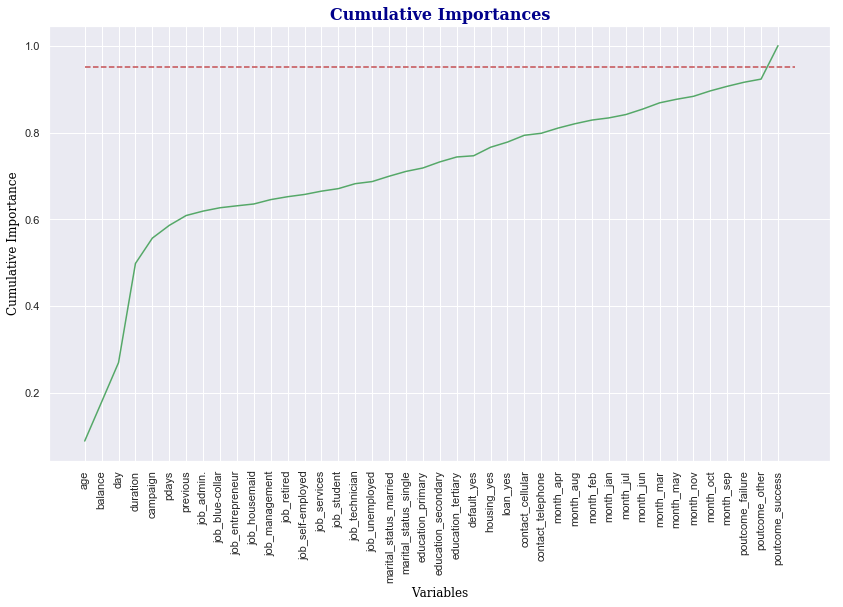

In [271]:

xvalues = list(range(len(list(impfeatdf.featureimportance))))

plt.figure(figsize=(14, 8))

# Make a line graph
plt.plot(xvalues, impfeatdf.cum_imp, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(impfeatdf.featureimportance), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(xvalues, impfeatdf.featurename, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variables', fontdict=labelfont)
plt.ylabel('Cumulative Importance', fontdict=labelfont)
plt.title('Cumulative Importances', fontdict=titlefont)

# Feature Selection without dummy encoding

In [198]:
features_nod = bankdf.loc[ : , bankdf.columns != 'class' ]
features_nod.head()

,age,job,marital_status,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [199]:
target_nod = bankdf['class' ]
target_nod.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

# Building Models

In [202]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 1)

In [203]:
print(X_train.shape)
print(y_train.shape)


print(X_test.shape)
print(y_test.shape)

(33908, 42)
(33908,)
(11303, 42)
(11303,)


In [204]:
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=1,           # for consistent results
                                      n_estimators = 200,       # number of tress in forest
                                      oob_score=True,           # OOB Score to get performance
                                      bootstrap=True, 
                                      n_jobs=-1,                # for using all cores
                                      class_weight="balanced"   # for handling imbalanced classes
                                     ) 
# Train model
basemodel = randomforest.fit(X_train, y_train)

In [205]:
# Calculate feature importances
importances = basemodel.feature_importances_
importances

array([0.07837897, 0.08089709, 0.06807511, 0.35146214, 0.03490439,
       0.03641677, 0.02465697, 0.0073009 , 0.00873987, 0.00328827,
       0.00246237, 0.00773345, 0.00464631, 0.00345283, 0.00529114,
       0.00412386, 0.00797945, 0.0033642 , 0.01021642, 0.00865501,
       0.00627292, 0.00945216, 0.00905967, 0.00134773, 0.02880868,
       0.01021228, 0.02592884, 0.00566059, 0.01136838, 0.01000693,
       0.00802238, 0.00485911, 0.00926601, 0.00995869, 0.01194849,
       0.01460959, 0.00789095, 0.01261631, 0.00674891, 0.00693136,
       0.00306996, 0.03391456])

In [206]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
indices

array([ 3,  1,  0,  2,  5,  4, 41, 24, 26,  6, 35, 37, 34, 28, 18, 25, 29,
       33, 21, 32, 22,  8, 19, 30, 16, 36, 11,  7, 39, 38, 20, 27, 14, 31,
       12, 15, 13, 17,  9, 40, 10, 23], dtype=int64)

In [207]:
# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]
print(names)

['duration', 'balance', 'age', 'day', 'pdays', 'campaign', 'poutcome_success', 'housing_yes', 'contact_cellular', 'previous', 'month_may', 'month_oct', 'month_mar', 'month_apr', 'marital_status_married', 'loan_yes', 'month_aug', 'month_jun', 'education_secondary', 'month_jul', 'education_tertiary', 'job_blue-collar', 'marital_status_single', 'month_feb', 'job_technician', 'month_nov', 'job_management', 'job_admin.', 'poutcome_failure', 'month_sep', 'education_primary', 'contact_telephone', 'job_services', 'month_jan', 'job_retired', 'job_student', 'job_self-employed', 'job_unemployed', 'job_entrepreneur', 'poutcome_other', 'job_housemaid', 'default_yes']


In [208]:
# View out-of-bag-error
randomforest.oob_score_
# 0.9025303763123746 for 200 estimators

0.9025303763123746

In [209]:
# Predicting the target variable - class
y_pred = basemodel.predict(X_test)

In [218]:
# Get predicted probabilities
y_prob = basemodel.predict_proba(X_test)[:,1]

In [220]:
basemodel.predict_proba(X_test)[:,1]

array([0.005, 0.   , 0.255, ..., 0.17 , 0.375, 0.005])

In [221]:
#basemodel.predict_proba(X_test)

array([[0.995, 0.005],
       [1.   , 0.   ],
       [0.745, 0.255],
       ...,
       [0.83 , 0.17 ],
       [0.625, 0.375],
       [0.995, 0.005]])

# Model Evaluation

In [214]:
# Get accuracy score
randomforest.score(X_test, y_test)

0.9045386180660002

In [228]:
# Create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

matrix

array([[9791,  207],
       [ 872,  433]], dtype=int64)

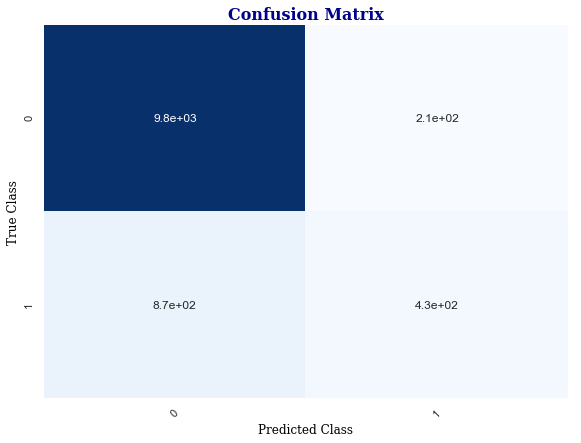

In [258]:
# Create pandas dataframe
dataframe = pd.DataFrame(matrix) #, index=class_names, columns=class_names)


# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix") 
plt.tight_layout()
plt.xlabel("Predicted Class", fontdict=labelfont)
plt.ylabel("True Class", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Confusion Matrix" , fontdict=titlefont)
plt.show()

In [273]:
# printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9998
           1       0.68      0.33      0.45      1305

   micro avg       0.90      0.90      0.90     11303
   macro avg       0.80      0.66      0.70     11303
weighted avg       0.89      0.90      0.89     11303



In [277]:
def fn_multiclass_metrics(actual_label, predicted_label):
    """
    function that takes acutal labels and predicted labels and returns
    accuracy, auc, precision, recall and f1 scores
    average = 'weighted' for multi class classification
    """
    accuracy = accuracy_score(actual_label, predicted_label)
    precision = precision_score(actual_label, predicted_label, average = 'weighted')
    recall = recall_score(actual_label, predicted_label, average = 'weighted')
    f1 = f1_score(actual_label, predicted_label, average = 'weighted')

    return (accuracy, precision, recall, f1)

In [279]:
acc, prec, recall, f1 = fn_multiclass_metrics(y_test, y_pred)

acc, prec, recall, f1


(0.9045386180660002,
 0.8903208445956925,
 0.9045386180660002,
 0.8897556560886072)

In [290]:
basemodel.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)>

As it is a binary classification problem AOC Curve would be a good evaluation metric


In [222]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
false_positive_rate, true_positive_rate, thresholds 

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00020004e-04,
        2.00040008e-04, 2.00040008e-04, 3.00060012e-04, 3.00060012e-04,
        3.00060012e-04, 3.00060012e-04, 6.00120024e-04, 6.00120024e-04,
        6.00120024e-04, 6.00120024e-04, 8.00160032e-04, 8.00160032e-04,
        9.00180036e-04, 1.00020004e-03, 1.10022004e-03, 1.20024005e-03,
        1.20024005e-03, 1.30026005e-03, 1.40028006e-03, 1.40028006e-03,
        1.40028006e-03, 1.60032006e-03, 1.70034007e-03, 1.70034007e-03,
        1.90038008e-03, 2.00040008e-03, 2.10042008e-03, 2.20044009e-03,
        2.30046009e-03, 2.60052010e-03, 2.80056011e-03, 2.90058012e-03,
        3.00060012e-03, 3.20064013e-03, 3.20064013e-03, 3.40068014e-03,
        3.70074015e-03, 3.90078016e-03, 4.20084017e-03, 4.60092018e-03,
        4.80096019e-03, 5.30106021e-03, 5.60112022e-03, 5.80116023e-03,
        6.10122024e-03, 6.60132026e-03, 6.90138028e-03, 7.00140028e-03,
        7.50150030e-03, 7.80156031e-03, 8.10162032e-03, 8.501700

In [323]:
def plotroc(false_positive_rate, true_positive_rate):

    """
    A function that takes false positive rate and true positive rate for plotting ROC curve
    Returns: none
    Expected o/p: ROC plot
    """

    # Plot ROC curve
    plt.figure(figsize=(12, 8))
    plt.title("Receiver Operating Characteristic", fontdict=titlefont)
    plt.plot(false_positive_rate, true_positive_rate,  label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel("True Positive Rate" , fontdict=labelfont)
    plt.xlabel("False Positive Rate", fontdict=labelfont)
    plt.legend(loc="lower right")
    plt.show()

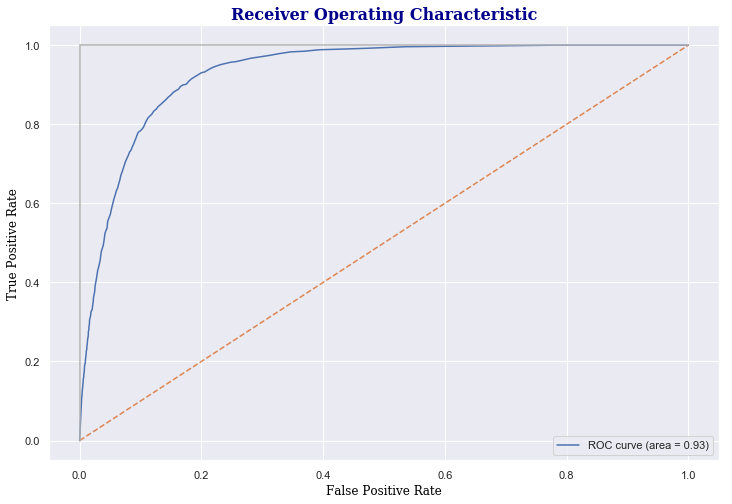

In [324]:
# Plot ROC curve
plotroc(false_positive_rate, true_positive_rate)

In [224]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9317289894760562

AUC of 0.93172, indicates that there is 94% chance the model separates between positive class and negative class.

Let us see if it can be further improved with some model tuning. 

In [307]:
# Calculate area under curve
roc_auc_score(y_test, y_prob)

0.9317289894760562

# Model Tuning

In [314]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [100, 250, 500, 1000, 2000]
    }

# Create a default rf model
rf = RandomForestClassifier(random_state=1,           # for consistent results
                                      oob_score=True,           # OOB Score to get performance
                                      bootstrap=True, 
                                      n_jobs=-1,                # for using all cores
                                      class_weight="balanced" )
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [315]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.4min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.1min finished


{'n_estimators': 2000}

In [316]:
best_grid = grid_search.best_estimator_
print(best_grid)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)


In [320]:
def evaluate(model, X_test, y_test):
    
    """
    function that takes model, test features and test labels 
    prints the model performance metrics
    returns none
    
    """
    print("\n Metrics for model with below parameters :\n")
    print(model.get_params)
    
    # Predicting the target variable - class
    y_pred = model.predict(X_test)
    
    # Get accuracy score
    print("\n Model score :\n")
    print(model.score(X_test, y_test))
    
    acc, prec, recall, f1 = fn_multiclass_metrics(y_test, y_pred)
    
    # printing classification report
    print("\n Classification Report :\n")
    print(classification_report(y_test, y_pred))
    
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    #print( "false_positive_rate, true_positive_rate, thresholds : " )
    plotroc(false_positive_rate, true_positive_rate)
    
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("\n ROC AUC :")
    print(roc_auc)
    

    
    return 


 Metrics for model with below parameters :

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)>

 Model score :

0.9067504202424135

 Classification Report :

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9998
           1       0.69      0.35      0.46      1305

   micro avg       0.91      0.91      0.91     11303
   macro avg       0.81      0.66      0.71     11303
weighted avg       0.89      0.91      0.89     11303



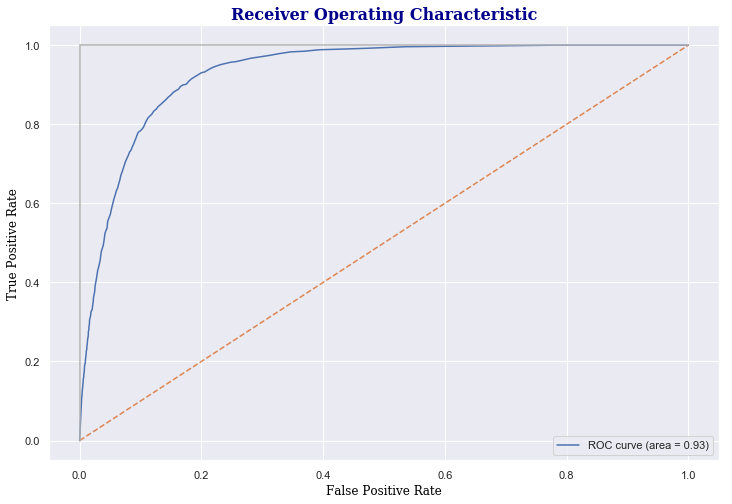


 ROC AUC :
0.9317289894760562


In [325]:
grid_accuracy = evaluate(best_grid, X_test, y_test)

#print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


 Metrics for model with below parameters :

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)>

 Model score :

0.9045386180660002

 Classification Report :

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9998
           1       0.68      0.33      0.45      1305

   micro avg       0.90      0.90      0.90     11303
   macro avg       0.80      0.66      0.70     11303
weighted avg       0.89      0.90      0.89     11303



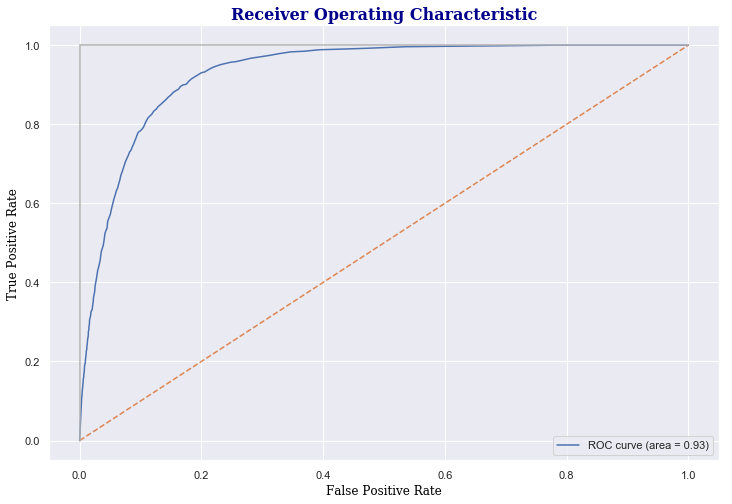


 ROC AUC :
0.9317289894760562


In [326]:
base_accuracy = evaluate(basemodel,  X_test, y_test)

# Model Deployment

In [329]:
# Save the model as a pickle in a file 
joblib.dump(best_grid, 'Model\customerprediction.pkl') 

['Model\\customerprediction.pkl']

In [330]:
# Load the model from the file 
tunedmodel_from_joblib = joblib.load('Model\customerprediction.pkl') 
